# Business Value of Web scraping

- Automating repetitive task (no more copy pasting from different sources)
- Create information dashboard
- Collect data sets from many different sources

---

<img src="http://i67.tinypic.com/2jcbwcw.png" align="left"></img><br><br><br><br>


## Notebook: Web Scraping & Web Crawling

**Author List**: Alexander Fred-Ojala

**Original Sources**: https://www.crummy.com/software/BeautifulSoup/bs4/doc/ & https://www.dataquest.io/blog/web-scraping-tutorial-python/

**License**: Feel free to do whatever you want to with this code

**Compatibility:** Python 2.x and 3.x

### Other Popular Web Scraping tools & libraries

This notebook mainly goes over how to webscrape data with the Python packages `requests` and  `BeautifulSoup`. However, there are many other Python packages that can be used for scraping.

Two very popular and widely used are:

* **[Selenium:](http://selenium-python.readthedocs.io/)** Pyton scraper that can act as a human when visiting websites, almost like a macro. Makes sense of modern Javascript based websites built with React, Angular etc.
* **[Scrapy:](https://scrapy.org/)** For automated scripting and has a lot of built in tools for web crawling and scraping that can facilitate the process (e.g. time based, IP rotation etc). Mainly script based scraping for larger projects.


### API: Application Programming Interfaces

Many services offer API's to grab data (Twitter, Wikipedia, Reddit etc.) We have already used an API in the Pandas notebook when we grabbed stock data in CSV format to do analysis. If a good API exists, it is usually the preferred method of obtaining data.

In [8]:
# Uncomment line below to install
#!pip install pandas_datareader

import pandas as pd
%matplotlib inline

pd.core.common.is_list_like = pd.api.types.is_list_like
from pandas_datareader import data as web
from datetime import datetime as dt

df_google = web.DataReader('GOOGL', data_source='iex', start=dt(2014, 1, 1), end=dt.now()).reset_index()

df_google.head()
# Volume is the number of shares or contracts traded

,date,open,high,low,close,volume
0,2014-02-18,601.3057,607.0414,600.6000,606.0454,4217243
1,2014-02-19,603.2527,605.2146,599.3498,601.7712,4207187
2,2014-02-20,602.1716,604.0459,600.7101,602.6571,3400388
3,2014-02-21,604.5089,605.5399,602.0189,602.4969,3722587
4,2014-02-24,603.2827,610.6901,603.1526,606.8613,3347574


In [9]:
# convert string 'date' to datetime format
df_google.describe()

,open,high,low,close,volume
count,1258.000000,1258.000000,1258.000000,1258.000000,1.258000e+03
mean,815.301457,822.203628,807.628500,815.086793,2.013457e+06
std,216.282258,218.680331,214.038866,216.434893,1.018178e+06
min,499.240000,500.280000,490.910000,497.060000,5.211410e+05
25%,595.070000,597.857500,590.345000,593.552500,1.386859e+06
50%,786.830000,791.540000,777.855000,784.295000,1.733700e+06
75%,1019.910000,1037.322500,1005.867500,1019.967500,2.292358e+06
max,1289.120000,1291.440000,1263.000000,1285.500000,1.285814e+07


In [10]:
df_google['date'] = pd.to_datetime(df_google['date'] \
                                   ,infer_datetime_format=True) 
df_google = df_google.set_index('date')
df_google.head()

,open,high,low,close,volume
date,,,,,
2014-02-18,601.3057,607.0414,600.6000,606.0454,4217243
2014-02-19,603.2527,605.2146,599.3498,601.7712,4207187
2014-02-20,602.1716,604.0459,600.7101,602.6571,3400388
2014-02-21,604.5089,605.5399,602.0189,602.4969,3722587
2014-02-24,603.2827,610.6901,603.1526,606.8613,3347574


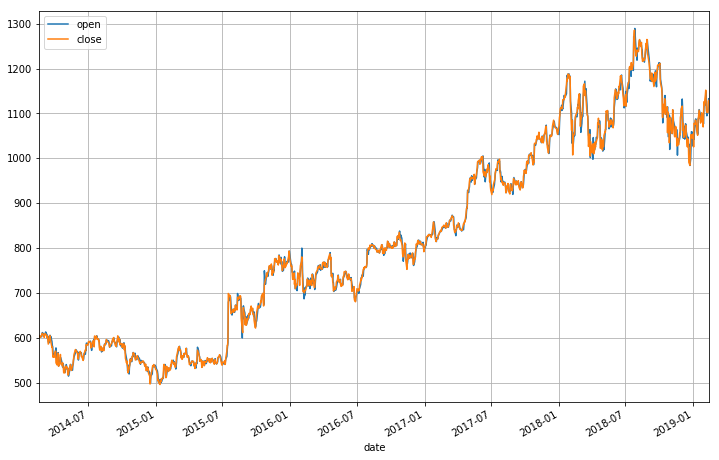

In [15]:
df_google[['open','close']].plot(figsize=(12,8),grid=True)

# Helpful webscraping Cheat Sheet

If you want a good documentation of functions in requests and Beautifulsoup (as well as how to save scarped data to an SQLite database), this is a good resource:

- https://blog.hartleybrody.com/web-scraping-cheat-sheet/

# Table of Contents
(Clickable document links)
___

### [0: Pre-steup](#sec0)
Document setup and Python 2 and Python 3 compability

### [1: Simple webscraping intro](#sec1)

Simple example of webscraping on a premade HTML template

### [2: Scrape Data-X Schedule](#sec2)

Find and scrape the current Data-X schedule. 

### [3: IMDB top 250 movies w MetaScore](#sec3)

Scrape IMDB and compare MetaScore to user reviews.

### [4: Scrape Images and Files](#sec4)

Scrape a website of Images, PDF's, CSV data or any other file type.

## [Breakout Problem: Scrape Weather Data](#secBK)

Scrape real time weather data in Berkeley.


### [Appendix](#sec5)

#### [Scrape Bloomberg sitemap for political news headlines](#sec6)

#### [Webcrawl Twitter, recusrive URL link fetcher + depth](#sec7)

#### [SEO, visualize webite categories as a tree](#sec8)

<a id='sec1'></a>
# Webscraping intro

In order to scrape content from a website we first need to download the HTML contents of the website. This can be done with the Python library **requests** that makes HTTP requests on the internet (with its `.get` method).

Then when we want to extract certain information from a website we use the scraping tool **BeautifulSoup4** (import bs4). In order to parse information with beautifulsoup we have to create a soup object from the HTML source code of a website.

In [16]:
import requests # The requests library is an 
# HTTP library for getting and posting content etc.

import bs4 as bs # BeautifulSoup4 is a Python library 
# for pulling data out of HTML and XML code.
# We can query markup languages for specific content

# Scraping a simple website

In [17]:
source = requests.get("https://alex.fo/other/data-x/") 
# a GET request will download the HTML webpage.

In [18]:
print(source) # If <Response [200]> then 
# the website has been downloaded succesfully

<Response [200]>


**Different types of repsonses:**
Generally status code starting with 2 indicates success. Status code starting with 4 or 5 indicates error. Frequent appearance of the status codes like 404 (Not Found), 403 (Forbidden), 408 (Request Timeout) might indicate that you got blocked.

In [19]:
print(source.content) # This is the HTML content of the website,
# as you can see it's quite hard to decipher

b'<!DOCTYPE html>\n<html>\n<head>\n\n<title>Data-X Webscrape Tutorial</title>\n\n<style>\ndiv.container {\n    width: 100%;\n    border: 1px solid gray;\n}\n\n.header {\n    color:green;\n}\n\n#second {\n    font-style: italic;\n}\n\n</style>\n\n</head>\n\n<body style="background-color: pink">\n\n<h1 class="header">Simple Data-X site</h1>\n\n\n<h3 id="second">This site is only live to be scraped.</h3>\n\n\n<div class="container">\n<p>Some cool text in a container</p>\n</div>\n  \n\n  <h4> Random list </h4>\n<nav class="regular_list">\n  <ul>\n    <li><a href="https://en.wikipedia.org/wiki/London">London</a></li>\n    <li><a href="https://en.wikipedia.org/wiki/Tokyo">Tokyo</a></li>\n  </ul>\n</nav>\n\n\n\n\n  <h2>Random London Information within p tags</h2>\n\n  <p>London is the capital city of England. It is the most populous city in the  United Kingdom, with a metropolitan area of over 13 million inhabitants.</p>\n  <p>Standing on the River Thames, London has been a major settlement f

In [20]:
print(type(source.content)) # type byte in Python 3

<class 'bytes'>


In [21]:
# Convert source.content to a beautifulsoup object 
# beautifulsoup can parse (extract specific information) HTML code

soup = bs.BeautifulSoup(source.content, features='html.parser') 
# we pass in the source content
# features specifies what type of code we are parsing, 
# here 'html.parser' specifies that we want beautiful soup to parse HTML code

In [22]:
print(type(soup))

<class 'bs4.BeautifulSoup'>


In [23]:
print(soup) # looks a lot nicer!

<!DOCTYPE html>

<html>
<head>
<title>Data-X Webscrape Tutorial</title>
<style>
div.container {
    width: 100%;
    border: 1px solid gray;
}

.header {
    color:green;
}

#second {
    font-style: italic;
}

</style>
</head>
<body style="background-color: pink">
<h1 class="header">Simple Data-X site</h1>
<h3 id="second">This site is only live to be scraped.</h3>
<div class="container">
<p>Some cool text in a container</p>
</div>
<h4> Random list </h4>
<nav class="regular_list">
<ul>
<li><a href="https://en.wikipedia.org/wiki/London">London</a></li>
<li><a href="https://en.wikipedia.org/wiki/Tokyo">Tokyo</a></li>
</ul>
</nav>
<h2>Random London Information within p tags</h2>
<p>London is the capital city of England. It is the most populous city in the  United Kingdom, with a metropolitan area of over 13 million inhabitants.</p>
<p>Standing on the River Thames, London has been a major settlement for two millennia, its history going back to its founding by the Romans, who named it Londi

Above we printed the HTML code of the website, decoded as a beautiful soup object.

### HTML tags
`<xxx> </xxx>`: are all the HTML tags, that specifies certain sections, stylings etc of the website, for more info: 
https://www.w3schools.com/tags/ref_byfunc.asp

Full list of HTML tags: https://developer.mozilla.org/en-US/docs/Web/HTML/Element

---
## `class` and `id`:

class and id attributes of HTML tags, they are used as hooks to give unique styling to certain elements and an id for sections / parts of the page.

- **id:** is a unique tag for a specific element (this often does not change)
- **class:** specifies a class of objects. Several elements in the HTML code can have the same class.

### Suppose we want to extract content that is shown on the website

In [24]:
# Inside the <body> tag of the website is where all the main content is
print(soup.body)

<body style="background-color: pink">
<h1 class="header">Simple Data-X site</h1>
<h3 id="second">This site is only live to be scraped.</h3>
<div class="container">
<p>Some cool text in a container</p>
</div>
<h4> Random list </h4>
<nav class="regular_list">
<ul>
<li><a href="https://en.wikipedia.org/wiki/London">London</a></li>
<li><a href="https://en.wikipedia.org/wiki/Tokyo">Tokyo</a></li>
</ul>
</nav>
<h2>Random London Information within p tags</h2>
<p>London is the capital city of England. It is the most populous city in the  United Kingdom, with a metropolitan area of over 13 million inhabitants.</p>
<p>Standing on the River Thames, London has been a major settlement for two millennia, its history going back to its founding by the Romans, who named it Londinium.</p>
<footer>footer content</footer>
</body>


In [27]:
print(soup.title) # Title of the website

<title>Data-X Webscrape Tutorial</title>


In [30]:
print(soup.find('title')) # same as .title

<title>Data-X Webscrape Tutorial</title>


In [31]:
# If we want to extract specific text
print(soup.find('p')) # will only return first <p> tag

<p>Some cool text in a container</p>


In [32]:
print(soup.find('p').text) # extracts the string within the <p> tag, strips it of tag

Some cool text in a container


In [35]:
# If we want to extract all <p> tags
print(soup.find_all('p')) # returns list of all <p> tags
print(type(soup.find_all('p'))) # returns list of all <p> tags

[<p>Some cool text in a container</p>, <p>London is the capital city of England. It is the most populous city in the  United Kingdom, with a metropolitan area of over 13 million inhabitants.</p>, <p>Standing on the River Thames, London has been a major settlement for two millennia, its history going back to its founding by the Romans, who named it Londinium.</p>]
<class 'bs4.element.ResultSet'>


In [ ]:
# we can also search for classes within all tags, using class_
# note _ is used to distinguish with Python's builtin class function

print(soup.find(class_='header')) 

In [ ]:
# We can also find tags with a speific id

print(soup.find(id='second'))

In [ ]:
print(soup.find_all(class_='regular_list')) # find all returns list, 
# even if there is only one object

In [ ]:
for p in soup.find_all('p'): # print all text paragraphs on the webpage
    print(p.text)

In [ ]:
# Extract links / urls
# Links in html is usually coded as <a href="url">
# where the link is url

print(soup.a)
print(type(soup.a))


In [ ]:
soup.a.get('href') 
# to get the link from href attribute

In [ ]:
links = soup.find_all('a')

In [ ]:
links

In [ ]:
a = 'run'
b = 'tomorrow'
'i wanna {c} {d} {c}'.format(d=a,c=b)

In [ ]:
# if we want to list links and their text info

links = soup.find_all('a')

for l in links:
    print("Info about {}: ".format(l.text), l.get('href')) 
    

# Other useful scraping tips

### robots.txt

Always check if a webiste has a `robots.txt` document specifying what parts of the site that you're allowed to scrape (however, the website cannot prevent requests from getting its content, but I'd recommend you all to be nice). It may also contain information about the scraping frequency allowed etc.

E.g. 
- http://www.imdb.com/robots.txt
- http://www.nytimes.com/robots.txt

### user-agent

When you're sending a request to a webpage (no matter if it comes from your computer, iphone, or Python's request package), then you also include a user-agent. This let's the webserver know how to render the contents for you. You can also send user-agent information via a request (to specify who you are for example, or to disguise that you're an automated scraper).

Find your machine's / browser's true user agent here: https://www.whoishostingthis.com/tools/user-agent/

In [ ]:
# user-agent example

headers = {
    'User-Agent': 'Mozilla/5.0 (X11; Ubuntu; Linux x86_64; rv:58.0) Gecko/20100101 Firefox/58.0',
    'From': 'data-x@gmail.com' 
}

response = requests.get('https://alex.fo/other/data-x/', headers=headers)
print(response)
print(response.headers) # the response will also have some meta informaiton about the content

<a id='sec2'></a>

# Data-X website Scraping
### Now let us scrape the current Syllabus Schedule from the Data-X website


In [ ]:
source = requests.get('https://data-x.blog/').content 
# get the source content

In [ ]:
source

In [ ]:
soup = bs.BeautifulSoup(source,'html.parser')

In [ ]:
print(soup.prettify()) 
# .prettify() method makes the HTML code more readable

# as you can see this code is more difficult 
# to read then the simple example above
# mostly because this is a real Wordpress website

#### Print the Title of the website

In [ ]:
print(soup.find('title').text) 
# check that we are at the correct website

#### Extract all paragraphs of text

In [ ]:
for p in soup.find_all('p'):
    print(p.text)

### Look at the navigation bar

In [ ]:
navigation_bar = soup.find('nav')
print(navigation_bar)

In [ ]:
# These are the linked subpages in the navigation bar
nav_bar = navigation_bar.text
print(nav_bar)

### Scrape the Syllabus of its content
(maybe to use in an App)

In [ ]:
# Now we want to find the Syllabus, 
# however we are at the root web page, not displaying the Syllabus

# Get all links from navigation bar at the data-x home webpage
for url in navigation_bar.find_all('a'): 
    link = url.get('href')
    if 'data-x.blog' in link: # check link to a subpage
        print(link) 
        if 'syllabus' in link:
            syllabus_url = link

In [ ]:
# syllabus is located at https://data-x.blog/syllabus/
print(syllabus_url)

In [ ]:
# Open new connection to the Syllabus url. Replace soup object.

source = requests.get(syllabus_url).content
soup = bs.BeautifulSoup(source, 'html.parser')

print(soup.body.prettify()) 
# we can see that the Syllabus is built up of <td>, <tr> and <table> tags

### Find the course schedule table from the syllabus:  
Usually organized data in HTML format on a website is stored in tables under `<table>, <tr>,` and `<td>` tags. Here we want to extract the information in the Data-X syllabus.

**NOTE:**  To identify element, class or id  name of the object of your interest on a web page, you can go to the link address in your browser, under 'more tools' option click __'developer tools'__. This opens  the 'Document object Model' of the webpage. Hover on the element of your interest on the webpage to check its location. This will help you in deciding which parts of 'soup content' you want to parse. More info at: https://developer.chrome.com/devtools

In [ ]:
# We can see that course schedule is in <table><table/> elements
# We can also get the table
full_table = soup.find_all('table')

In [ ]:
full_table

In [ ]:
# A new row in an HTML table starts with <tr> tag
# A new column entry is defined by <td> tag
table_result = list()
for table in full_table:
    for row in table.find_all('tr'):
        row_cells = row.find_all('td') # find all table data
        row_entries = [cell.text for cell in row_cells]
        print(row_entries) 
        table_result.append(row_entries)
        # get all the table data into a list

In [ ]:
# We can also read it in to a Pandas DataFrame
import pandas as pd
pd.set_option('display.max_colwidth', 10000)

df = pd.DataFrame(table_result)
df

In [ ]:
# Pandas can also grab tables from a website automatically

import pandas as pd

import html5lib
# requires html5lib: 
#!conda install --yes html5
dfs = pd.read_html('https://data-x.blog/syllabus/') 
# returns a list of all tables at url



In [ ]:
dfs[1]

In [ ]:
print(type(dfs)) #list of tables
print(len(dfs)) # we only have one table
print(type(dfs[0])) # stored as DataFrame
df = pd.concat(dfs,ignore_index=True)
df = df.dropna()

In [ ]:
# Looks so-so, however striped from break line characters etc.
df.head()

In [ ]:
# Make it nicer

# Assign column names
df.columns=  ['Part','Detailed Description']

# Assing week number
weeks = list()
i=0
for k in range(df.shape[0]):
    if 'Topic' in df.iloc[k,0]:
        i=i+1
    weeks.append('Lecture{}'.format(i))
df['Week'] = weeks

In [ ]:
df.head()

In [ ]:
# Set Week and Part as Multiindex
df = df.set_index(['Week','Part'])

In [ ]:
df.head(12).dropna()

<a id='sec3'></a>

# Keep a current list IMDB top 250 vs MetaScore

Let's say that we want to build an app that can display the most popular movies at the IMDB website.

We got to the URL that lists the top 250 movies according to the reviews: http://www.imdb.com/chart/top

We see that the entries are stored in a table format, so we try pandas.

In [ ]:
df_imdb = pd.read_html('https://www.imdb.com/chart/top',attrs={'class':'chart full-width'})[0]

In [ ]:
df_imdb.head()

In [ ]:
df_imdb = df_imdb.drop(df_imdb.columns[[0,3,4]],axis=1)

In [ ]:
df_imdb.tail()

In [ ]:
# Extract all URLs to find meta score
imdb_html = requests.get('http://www.imdb.com/chart/top').content
soup = bs.BeautifulSoup(imdb_html, features='html.parser')

In [ ]:
links = soup.find('table').find_all('a')


In [ ]:
urls = ['https://www.imdb.com'+l.get('href') for l in links]
urls[0]

In [ ]:
urls[-1]

In [ ]:
import numpy as np
meta_scores = np.zeros(250, dtype=int)

In [ ]:

headers = {
    'User-Agent': 'Mozilla/5.0 (X11; Ubuntu; Linux x86_64; rv:58.0) Gecko/20100101 Firefox/58.0',
    'From': 'data-x@gmail.com' 
}

for idx,url in enumerate(urls):
    print('Getting metascore for movie {}'.format(idx))
    film = requests.get(url, headers=headers, timeout=10)
    print(film)
    soup = bs.BeautifulSoup(film.content, features='html.parser')
    info = soup.find(class_='metacriticScore score_favorable titleReviewBarSubItem')
    meta_scores[idx] = int(info.find('span').text)
    if idx == 5:
        break

In [ ]:
df_imdb['meta_scores'] = meta_scores

In [ ]:
df_imdb.head(20)

<a id='sec4'></a>
# Scrape images and other files

Let's see how we can automatically find and download files linked at any website.

In [ ]:
# As we can see there are two images on the data-x.blog/resources
# say that we want to download them
# Images are displayed with the <img> tag in HTML

# open connection and create new soup

raw = requests.get('https://data-x.blog/resources/').content
soup = bs.BeautifulSoup(raw,features='html.parser')

print(soup.find('img')) 
# as we can see below the image urls 
# are stored in the src attribute inside the img tag

In [ ]:
# Parse all url to the images
img_urls = list()
for img in soup.find_all('img'): 
    img_url = img.get('src') 
    if '.jpeg' in img_url or '.jpg' in img_url:
        print(img_url)
        img_urls.append(img_url)
    

In [ ]:
%ls

In [ ]:
# To download and save files with Python we can use 
# the shutil library which is a file operations library
'''
The shutil module offers a number of high-level operations on files and 
collections of files. In particular, functions are provided which support 
file copying and removal.
'''

import shutil

for idx, img_url in enumerate(img_urls): 
    #enumarte to create a file integer name for every image
    
    # make a request to the image URL
    img_source = requests.get(img_url, stream=True) 
    # we set stream = True to download/ 
    # stream the content of the data
    
    with open('img'+str(idx)+'.jpg', 'wb') as file: 
        # open file connection, create file and write to it
        shutil.copyfileobj(img_source.raw, file) 
        # save the raw file object

    del img_source # to remove the file from memory

In [ ]:
%ls

## Scraping function to download files of any type from a website

Below is a function that takes in a website and a specific file type to download X of them from the website.

In [ ]:
# Extended scraping function of any file format
import os # To interact with operating system and format file name
import shutil # To copy file object from python to disk
import requests
import bs4 as bs

def py_file_scraper(url, html_tag='img', source_tag='src', file_type='.jpg',max=-1):
    
    '''
    Function that scrapes a website for certain file formats.
    The files will be placed in a folder called "files" 
    in the working directory.
    
    url = the url we want to scrape from
    html_tag = the file tag (usually img for images or 
    a for file links)
    
    source_tag = the source tag for the file url 
    (usually src for images or href for files)
    
    file_type = .png, .jpg, .pdf, .csv, .xls etc.
    
    max = integer (max number of files to scrape, 
    if = -1 it will scrape all files)
    '''
    
    # make a directory called 'files' 
    # for the files if it does not exist
    if not os.path.exists('files/'):
        os.makedirs('files/')
    print('Loading content from the url...')
    source = requests.get(url).content
    print('Creating content soup...')
    soup = bs.BeautifulSoup(source,'html.parser')
    
    i=0
    print('Finding tag:%s...'%html_tag)
    for n, link in enumerate(soup.find_all(html_tag)):
        file_url=link.get(source_tag)
        print ('\n',n+1,'. File url',file_url)
        
        
        if 'http' in file_url: # check that it is a valid link
            print('It is a valid url..')
            
            
            if file_type in file_url: #only check for specific 
                # file type
                
                print('%s FILE TYPE FOUND IN THE URL...'%file_type)
                file_name = os.path.splitext(os.path.basename(file_url))[0] + file_type 
                #extract file name from url

                file_source = requests.get(file_url, stream = True)
             
                # open new stream connection

                with open('./files/'+file_name, 'wb') as file: 
                    # open file connection, create file and 
                    # write to it
                    
                    shutil.copyfileobj(file_source.raw, file) 
                    # save the raw file object
                    
                    print('DOWNLOADED:',file_name)
                    
                    i+=1
                    
                del file_source # delete from memory
            else:
                print('%s file type NOT found in url:'%file_type)
                print('EXCLUDED:',file_url) 
                # urls not downloaded from
                
        if i == max:
            print('Max reached')
            break
            

    print('Done!')

# Scrape funny cat pictures

In [ ]:
py_file_scraper('https://funcatpictures.com/') 
# scrape cats

In [ ]:
!ls ./files

# Scrape pdf's from Data-X site

In [ ]:
py_file_scraper('https://data-x.blog/resources',
                html_tag='a',source_tag='href',file_type='.pdf', \
                max=5)

# Scrape real data CSV files from websites

In [ ]:
py_file_scraper('http://www-eio.upc.edu/~pau/cms/rdata/datasets.html',
                html_tag='a', # R data sets
                source_tag='href', file_type='.csv',max=5)

# Extended tip: IP rotation

The website might get suspicious if a lot of requests are coming from the same IP address. If you use a shared proxy, VPN or TOR that can help you get around that problem

For example:

```pyton
proxies = {'http' : 'http://10.10.0.0:0000',  
          'https': 'http://120.10.0.0:0000'}
response = requests.get('https://whateverwebsite.com', proxies=proxies, timeout=5)

```

Also note the `timeout` argument, this specifies that the request should not be carried out indefinitely (prevents the webserver from detecting scraping activity).
 

By using a shared proxy, the website will see the IP address of the proxy server and not yours. A VPN connects you to another network and the IP address of the VPN provider will be sent to the website.

---
<a id='secBK'></a>
# Breakout problem


In this Breakout Problem you should extract live weather data in Berkeley from:

[http://forecast.weather.gov/MapClick.php?lat=37.87158815800046&lon=-122.27274583799971](http://forecast.weather.gov/MapClick.php?lat=37.87158815800046&lon=-122.27274583799971)

* Task scrape
    * period / day (as Tonight, Friday, FridayNight etc.)
    * the temperature for the period (as Low, High)
    * the long weather description (e.g. Partly cloudy, with a low around 49..)
    
Store the scraped data strings in a Pandas DataFrame



**Hint:** The weather information is found in a div tag with `id='seven-day-forecast'`




# Appendix

<a id='sec6'></a>
# Scrape Bloomberg sitemap (XML) for current political news

In [ ]:
# XML documents - site maps, all the urls. just between tags
# XML human and machine readable.
# Newest links: all the links for FIND SITE MAP!
# News websites will have sitemaps for politics, bot constantly
# tracking news track the sitemaps

# Before scraping a website look at robots.txt file
bs.BeautifulSoup(requests.get('https://www.bloomberg.com/robots.txt').content,'lxml')

In [ ]:
source = requests.get('https://www.bloomberg.com/feeds/bpol/sitemap_news.xml').content
soup = bs.BeautifulSoup(source,'xml') # Note parser 'xml'

In [ ]:
print(soup.prettify())

In [ ]:
# Find political news headlines
for news in soup.find_all({'news'}):
    print(news.title.text)
    print(news.publication_date.text)
    #print(news.keywords.text)
    print('\n')

<a id='sec7'></a>
# Web crawl

Web crawling is almost like webscraping, but instead you crawl a specific website (and often its subsites) and extract meta information. It can be seen as simple, recursive scraping. This can be used for web indexing (in order to build a web search engine).

## Web crawl Twitter account
**Authors:** Kunal Desai & Alexander Fred Ojala

In [ ]:
import bs4
from bs4 import BeautifulSoup
import requests

In [ ]:
# Helper function to maintain the urls and the number of times they appear

url_dict = dict()

def add_to_dict(url_d, key):
    if key in url_d:
        url_d[key] = url_d[key] + 1
    else:
        url_d[key] = 1

In [ ]:
# Recursive function which extracts links from the given url upto a given 'depth'.

def get_urls(url, depth):
    if depth == 0:
        return
    r = requests.get(url)
    soup = BeautifulSoup(r.text, 'html.parser')
    for link in soup.find_all('a'):
        if link.has_attr('href') and "https://" in link['href']:
#             print(link['href'])
            add_to_dict(url_dict, link['href'])
            get_urls(link['href'], depth - 1)

In [ ]:
# Iterative function which extracts links from the given url upto a given 'depth'.

def get_urls_iterative(url, depth):
    urls = [url]
    for url in urls:
        r = requests.get(url)
        soup = BeautifulSoup(r.text, 'html.parser')
        for link in soup.find_all('a'):
            if link.has_attr('href') and "https://" in link['href']:
                add_to_dict(url_dict, link['href'])
                urls.append(link['href'])
        if len(urls) > depth:
            break

In [ ]:
get_urls("https://twitter.com/GolfWorld", 2)
for key in url_dict:
    print(str(key) + "  ----   " + str(url_dict[key]))

<a id='sec8'></a>
# SEO: Visualize sitemap and categories in a website

**Source:** https://www.ayima.com/guides/how-to-visualize-an-xml-sitemap-using-python.html

In [ ]:
# Visualize XML sitemap with categories!
import requests
from bs4 import BeautifulSoup

url = 'https://www.sportchek.ca/sitemap.xml'
url = 'https://www.bloomberg.com/feeds/bpol/sitemap_index.xml'
page = requests.get(url)
print('Loaded page with: %s' % page)

sitemap_index = BeautifulSoup(page.content, 'html.parser')
print('Created %s object' % type(sitemap_index))

In [ ]:
urls = [element.text for element in sitemap_index.findAll('loc')]
print(urls)

In [ ]:
def extract_links(url):
    ''' Open an XML sitemap and find content wrapped in loc tags. '''

    page = requests.get(url)
    soup = BeautifulSoup(page.content, 'html.parser')
    links = [element.text for element in soup.findAll('loc')]

    return links

sitemap_urls = []
for url in urls:
    links = extract_links(url)
    sitemap_urls += links

print('Found {:,} URLs in the sitemap'.format(len(sitemap_urls)))

In [ ]:
with open('sitemap_urls.dat', 'w') as f:
    for url in sitemap_urls:
        f.write(url + '\n')

In [ ]:
'''
Categorize a list of URLs by site path.
The file containing the URLs should exist in the working directory and be
named sitemap_urls.dat. It should contain one URL per line.
Categorization depth can be specified by executing a call like this in the
terminal (where we set the granularity depth level to 5):
    python categorize_urls.py --depth 5
The same result can be achieved by setting the categorization_depth variable
manually at the head of this file and running the script with:
    python categorize_urls.py
'''
from __future__ import print_function


categorization_depth=3



# Main script functions


def peel_layers(urls, layers=3):
    ''' Builds a dataframe containing all unique page identifiers up
    to a specified depth and counts the number of sub-pages for each.
    Prints results to a CSV file.
    urls : list
        List of page URLs.
    layers : int
        Depth of automated URL search. Large values for this parameter
        may cause long runtimes depending on the number of URLs.
    '''

    # Store results in a dataframe
    sitemap_layers = pd.DataFrame()

    # Get base levels
    bases = pd.Series([url.split('//')[-1].split('/')[0] for url in urls])
    sitemap_layers[0] = bases

    # Get specified number of layers
    for layer in range(1, layers+1):

        page_layer = []
        for url, base in zip(urls, bases):
            try:
                page_layer.append(url.split(base)[-1].split('/')[layer])
            except:
                # There is nothing that deep!
                page_layer.append('')

        sitemap_layers[layer] = page_layer

    # Count and drop duplicate rows + sort
    sitemap_layers = sitemap_layers.groupby(list(range(0, layers+1)))[0].count()\
                     .rename('counts').reset_index()\
                     .sort_values('counts', ascending=False)\
                     .sort_values(list(range(0, layers)), ascending=True)\
                     .reset_index(drop=True)

    # Convert column names to string types and export
    sitemap_layers.columns = [str(col) for col in sitemap_layers.columns]
    sitemap_layers.to_csv('sitemap_layers.csv', index=False)

    # Return the dataframe
    return sitemap_layers




sitemap_urls = open('sitemap_urls.dat', 'r').read().splitlines()
print('Loaded {:,} URLs'.format(len(sitemap_urls)))

print('Categorizing up to a depth of %d' % categorization_depth)
sitemap_layers = peel_layers(urls=sitemap_urls,
                             layers=categorization_depth)
print('Printed {:,} rows of data to sitemap_layers.csv'.format(len(sitemap_layers)))


In [ ]:
'''
Visualize a list of URLs by site path.
This script reads in the sitemap_layers.csv file created by the
categorize_urls.py script and builds a graph visualization using Graphviz.
Graph depth can be specified by executing a call like this in the
terminal:
    python visualize_urls.py --depth 4 --limit 10 --title "My Sitemap" --style "dark" --size "40"
The same result can be achieved by setting the variables manually at the head
of this file and running the script with:
    python visualize_urls.py
'''
from __future__ import print_function


# Set global variables

graph_depth = 3  # Number of layers deep to plot categorization
limit = 3       # Maximum number of nodes for a branch
title = ''       # Graph title
style = 'light'  # Graph style, can be "light" or "dark"
size = '8,5'     # Size of rendered PDF graph


# Import external library dependencies

import pandas as pd
import graphviz



# Main script functions

def make_sitemap_graph(df, layers=3, limit=50, size='8,5'):
    ''' Make a sitemap graph up to a specified layer depth.
    sitemap_layers : DataFrame
        The dataframe created by the peel_layers function
        containing sitemap information.
    layers : int
        Maximum depth to plot.
    limit : int
        The maximum number node edge connections. Good to set this
        low for visualizing deep into site maps.
    '''


    # Check to make sure we are not trying to plot too many layers
    if layers > len(df) - 1:
        layers = len(df)-1
        print('There are only %d layers available to plot, setting layers=%d'
              % (layers, layers))


    # Initialize graph
    f = graphviz.Digraph('sitemap', filename='sitemap_graph_%d_layer' % layers)
    f.body.extend(['rankdir=LR', 'size="%s"' % size])


    def add_branch(f, names, vals, limit, connect_to=''):
        ''' Adds a set of nodes and edges to nodes on the previous layer. '''

        # Get the currently existing node names
        node_names = [item.split('"')[1] for item in f.body if 'label' in item]

        # Only add a new branch it it will connect to a previously created node
        if connect_to:
            if connect_to in node_names:
                for name, val in list(zip(names, vals))[:limit]:
                    f.node(name='%s-%s' % (connect_to, name), label=name)
                    f.edge(connect_to, '%s-%s' % (connect_to, name), label='{:,}'.format(val))


    f.attr('node', shape='rectangle') # Plot nodes as rectangles

    # Add the first layer of nodes
    for name, counts in df.groupby(['0'])['counts'].sum().reset_index()\
                          .sort_values(['counts'], ascending=False).values:
        f.node(name=name, label='{} ({:,})'.format(name, counts))

    if layers == 0:
        return f

    f.attr('node', shape='oval') # Plot nodes as ovals
    f.graph_attr.update()

    # Loop over each layer adding nodes and edges to prior nodes
    for i in range(1, layers+1):
        cols = [str(i_) for i_ in range(i)]
        nodes = df[cols].drop_duplicates().values
        for j, k in enumerate(nodes):

            # Compute the mask to select correct data
            mask = True
            for j_, ki in enumerate(k):
                mask &= df[str(j_)] == ki

            # Select the data then count branch size, sort, and truncate
            data = df[mask].groupby([str(i)])['counts'].sum()\
                    .reset_index().sort_values(['counts'], ascending=False)

            # Add to the graph
            add_branch(f,
                       names=data[str(i)].values,
                       vals=data['counts'].values,
                       limit=limit,
                       connect_to='-'.join(['%s']*i) % tuple(k))

            print(('Built graph up to node %d / %d in layer %d' % (j, len(nodes), i))\
                    .ljust(50), end='\r')

    return f


def apply_style(f, style, title=''):
    ''' Apply the style and add a title if desired. More styling options are
    documented here: http://www.graphviz.org/doc/info/attrs.html#d:style
    f : graphviz.dot.Digraph
        The graph object as created by graphviz.
    style : str
        Available styles: 'light', 'dark'
    title : str
        Optional title placed at the bottom of the graph.
    '''

    dark_style = {
        'graph': {
            'label': title,
            'bgcolor': '#3a3a3a',
            'fontname': 'Helvetica',
            'fontsize': '18',
            'fontcolor': 'white',
        },
        'nodes': {
            'style': 'filled',
            'color': 'white',
            'fillcolor': 'black',
            'fontname': 'Helvetica',
            'fontsize': '14',
            'fontcolor': 'white',
        },
        'edges': {
            'color': 'white',
            'arrowhead': 'open',
            'fontname': 'Helvetica',
            'fontsize': '12',
            'fontcolor': 'white',
        }
    }

    light_style = {
        'graph': {
            'label': title,
            'fontname': 'Helvetica',
            'fontsize': '18',
            'fontcolor': 'black',
        },
        'nodes': {
            'style': 'filled',
            'color': 'black',
            'fillcolor': '#dbdddd',
            'fontname': 'Helvetica',
            'fontsize': '14',
            'fontcolor': 'black',
        },
        'edges': {
            'color': 'black',
            'arrowhead': 'open',
            'fontname': 'Helvetica',
            'fontsize': '12',
            'fontcolor': 'black',
        }
    }

    if style == 'light':
        apply_style = light_style

    elif style == 'dark':
        apply_style = dark_style

    f.graph_attr = apply_style['graph']
    f.node_attr = apply_style['nodes']
    f.edge_attr = apply_style['edges']

    return f




# Read in categorized data
sitemap_layers = pd.read_csv('sitemap_layers.csv', dtype=str)
# Convert numerical column to integer
sitemap_layers.counts = sitemap_layers.counts.apply(int)
print('Loaded {:,} rows of categorized data from sitemap_layers.csv'\
        .format(len(sitemap_layers)))

print('Building %d layer deep sitemap graph' % graph_depth)
f = make_sitemap_graph(sitemap_layers, layers=graph_depth,
                       limit=limit, size=size)
f = apply_style(f, style=style, title=title)

f.render(cleanup=True)
print('Exported graph to sitemap_graph_%d_layer.pdf' % graph_depth)


